# Calore specifico e Calore latente acqua

## 1. Misura del calore specifico di alcuni materiali

In [5]:
dati = {
    'materiale_1': {
        'mis1' : {
            't1': 67.2,
            't_acq': 26.1,
            't_fin': 28.2,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.7
        },
        'mis2' : {
            't1': 64.4,
            't_acq': 28.4,
            't_fin': 30.8,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.3
        },
        'mis3' : {
            't1': 61.6,
            't_acq': 30.8,
            't_fin': 32.8,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.3
        },
        'mis4' : {
            't1': 60.0,
            't_acq': 32.4,
            't_fin': 34.0,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 929.4
        },
        'mis5' : {
            't1': 57.9,
            't_acq': 34.0,
            't_fin': 35.0,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 929.2
        } 
    },


    'materiale_2': {
        'mis1' : {
            't1': 63.2,
            't_acq': 35,
            't_fin': 36,
            'm_c': 194.5,
            'm_th': 689.6,
            'm_tot': 946.2
        },
        'mis2' : {
            't1': 60.0,
            't_acq': 36.6,
            't_fin': 37.6,
            'm_c': 194.5,
            'm_th': 689.6,
            'm_tot': 945.7
        },
    },

    'materiale_3': {
        'mis1' : {
            't1': 67.6,
            't_acq': 19.8,
            't_fin': 20.8,
            'm_c': 55.5,
            'm_th': 689.6,
            'm_tot': 900
        },
        'mis2' : {
            't1': 64.0,
            't_acq': 21.8,
            't_fin': 22.2,
            'm_c': 55.5,
            'm_th': 689.6,
            'm_tot': 899.6
        },
    },

    'materiale_4': {
        'mis1' : {
            't1': 61.8,
            't_acq': 22.4,
            't_fin': 24.4,
            'm_c': 49.9,
            'm_th': 689.6,
            'm_tot': 899.2
        },
        'mis2' : {
            't1': 59.2,
            't_acq': 25,
            't_fin': 26.8,
            'm_c': 49.9,
            'm_th': 689.6,
            'm_tot': 898.5
        }
    }
}

In [6]:
def calcola_calore_specifico(dict, key):
    # errori masse e temperature
    t_error = 0.2
    m_error = 0.1

    # massa equivalente 
    M_e = 25
    d_Me = 5

    cal_arr = []

    for nmis_key in dict[key]:
        # calcolo massa d'acqua
        m_acq = dict[key][nmis_key]['m_tot'] - dict[key][nmis_key]['m_th'] 

        # massa totale: acqua e massa equivalente
        m_acq_eq = m_acq + M_e
        d_m_acq_eq = 2 * m_error + d_Me

        # differenza temperature iniziali
        var_Ti = dict[key][nmis_key]['t_acq'] - dict[key][nmis_key]['t_fin']
        d_var_Ti = 2 * t_error

        # differenza temperature finali
        var_Tf = dict[key][nmis_key]['t_fin'] - dict[key][nmis_key]['t1']  
        d_var_Tf = 2 * t_error

        # massa corpo
        mc = dict[key][nmis_key]['m_c']

        # calore specifico
        cs = (m_acq_eq * var_Ti)/(mc * var_Tf)

        # errore calore specifico
        rel_m_acq = d_m_acq_eq/m_acq_eq
        rel_Ti = abs(d_var_Ti/var_Ti)
        rel_mc = abs(m_error/mc)
        tot_rel_err = rel_m_acq + 2*rel_Ti + rel_mc

        cs_error = cs * tot_rel_err
        
        cal_arr.append(cs)
        print(f'cs: {cs}/{cs_error}')

    return cal_arr


cal_arr = calcola_calore_specifico(dati, 'materiale_1')

cs: 0.1806867785430205/0.07259180600650494
cs: 0.23932624752296894/0.08476105513709131
cs: 0.23267829620288588/0.09791846779680899
cs: 0.20549034823940263/0.10703961339869167
cs: 0.14570725287312017/0.11961302753298761


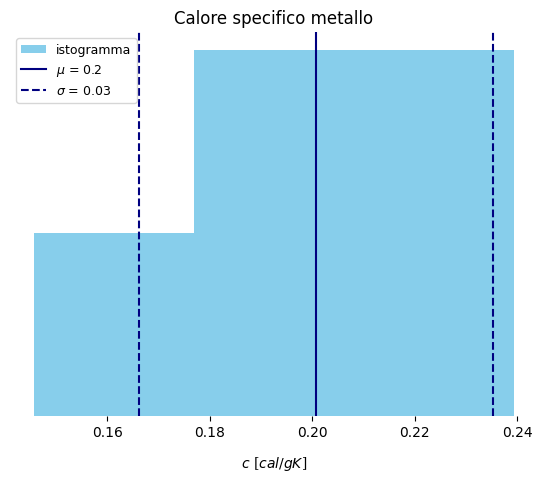

In [9]:
# distribuzione calori specifici
import matplotlib.pyplot as plt
import numpy as np


media = np.mean(cal_arr) 
std = np.std(cal_arr)

# grafico distribuzioni con media e mediana sovrapposta
fig, axs = plt.subplots(1, 1)


plt.subplots_adjust(left=0.075,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.3)

# img1: distribuzione misura accellerometro asse x
axs.hist(cal_arr, bins=3, label='istogramma', color='skyblue')
axs.axvline(media, c='navy', label=f'$\mu$ = {round(media,2)}')
axs.axvline(media + std, c='navy', linestyle='--', label=f'$\sigma$ = {round(std,2)}')
axs.axvline(media - std, c='navy', linestyle='--')
axs.legend(loc='upper left', fontsize=9)
axs.set_xlabel('$c$ [$cal/gK$]', labelpad=11, fontsize=10, fontname='Serif')
axs.set_title('Calore specifico metallo')



# fig.supylabel('Frequenza')

axs.set_yticks([])
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)

plt.show()